# Assignment 02

## Data Wrangling

Create an “Academic performance” dataset of students and perform the following operations using Python. transformation should be one of the following reasons: to change the scale for better

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. Apply data transformations on at least one of the variables.
3. Apply data transformations on at least one of the variables. The purpose of this: understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

Dataset details: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Renaming Columns

In [3]:
df = df.rename(columns = {
    "race/ethnicity": "race",
    "parental level of education": "parent_edu",
    "test preparation course": "test_course",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})
df

,gender,race,parent_edu,lunch,test_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## 2.1 Checking for null values

In [16]:
df.isnull().sum()

gender             0
race               0
parent_edu         0
lunch              0
test_course        0
math_score         0
reading_score      0
writing_score      0
gender_enc         0
race_enc           0
parent_edu_enc     0
lunch_enc          0
test_course_enc    0
dtype: int64

## 2.2 Checking for outliers

<Axes: ylabel='writing_score'>

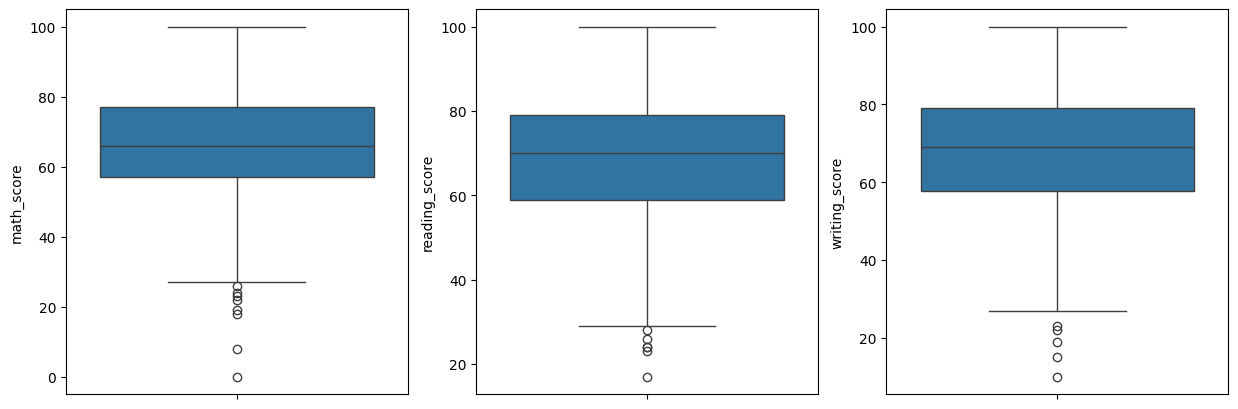

In [4]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=df["math_score"], ax=axes[0])
sns.boxplot(data=df["reading_score"], ax=axes[1])
sns.boxplot(data=df["writing_score"], ax=axes[2])

<Axes: xlabel='writing_score', ylabel='Count'>

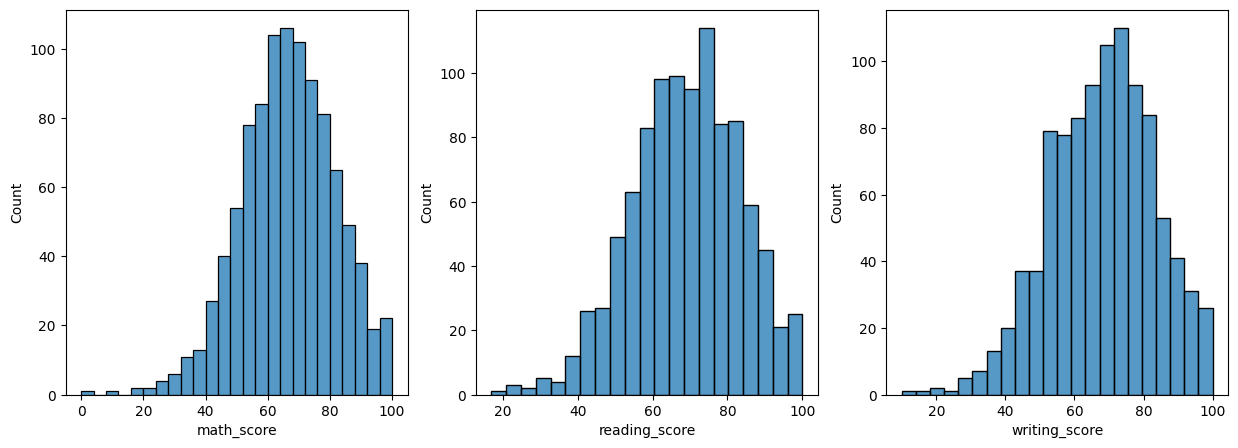

In [5]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(data=df["math_score"], ax=axes[0])
sns.histplot(data=df["reading_score"], ax=axes[1])
sns.histplot(data=df["writing_score"], ax=axes[2])

In [6]:
def remove_outliers(feature):
    global df
    q3,q1 = np.percentile(df[feature], [75,25])
    iqr = q3-q1
    df = df[ (df[feature] <= q3 + 1.5*iqr) & (df[feature] >= q1 - 1.5*iqr) ]

In [7]:
remove_outliers("math_score")
remove_outliers("reading_score")
remove_outliers("writing_score")

<Axes: ylabel='writing_score'>

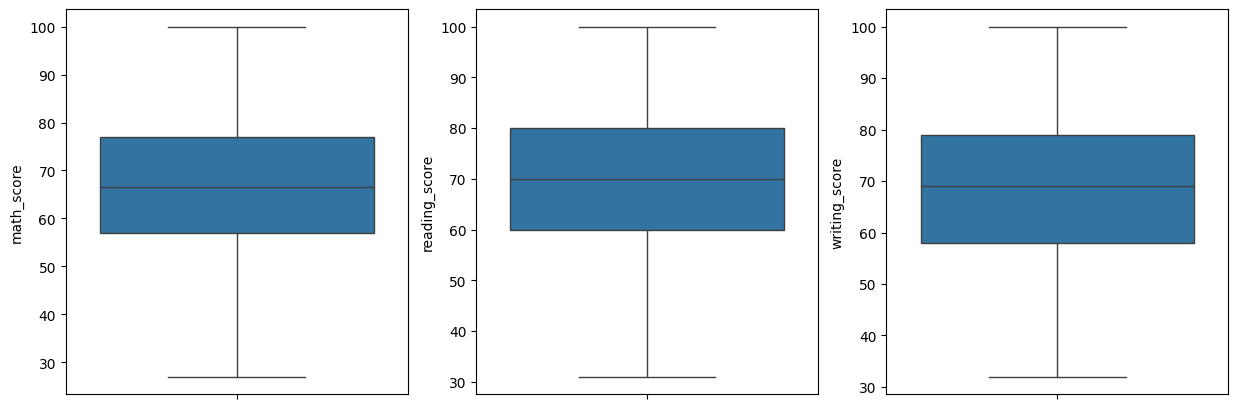

In [8]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.boxplot(data=df["math_score"], ax=axes[0])
sns.boxplot(data=df["reading_score"], ax=axes[1])
sns.boxplot(data=df["writing_score"], ax=axes[2])

<Axes: xlabel='writing_score', ylabel='Count'>

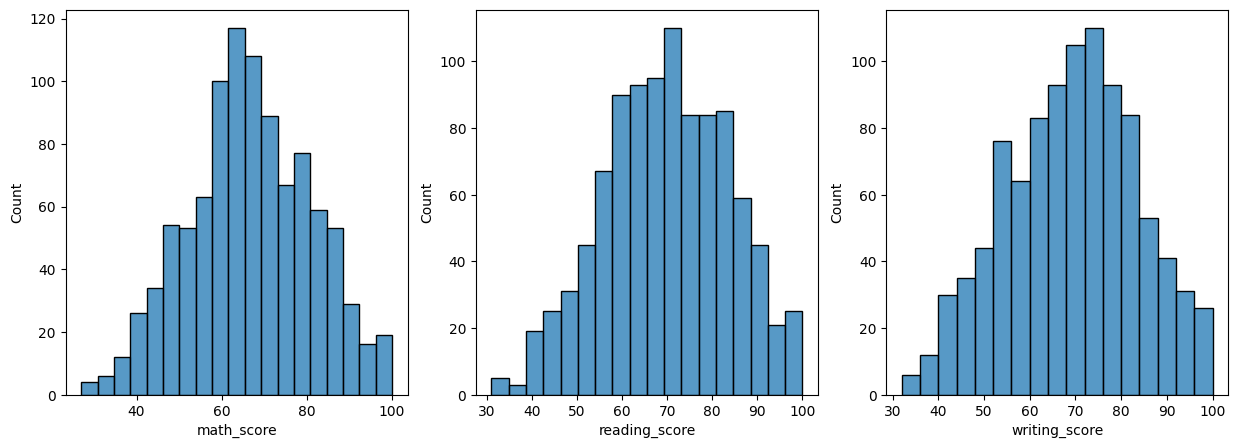

In [9]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(data=df["math_score"], ax=axes[0])
sns.histplot(data=df["reading_score"], ax=axes[1])
sns.histplot(data=df["writing_score"], ax=axes[2])

## Label Encoding

### Checking value counts

In [10]:
df.race.value_counts()

race
group C    315
group D    261
group B    183
group E    139
group A     88
Name: count, dtype: int64

In [11]:
df.parent_edu.value_counts()

parent_edu
some college          222
associate's degree    221
high school           191
some high school      175
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [12]:
df.lunch.value_counts()

lunch
standard        642
free/reduced    344
Name: count, dtype: int64

In [13]:
df.test_course.value_counts()

test_course
none         629
completed    357
Name: count, dtype: int64

### Label Encoding using Scikit-Learn's LabelEncoder

In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["gender_enc"] = encoder.fit_transform(df["gender"])
df["race_enc"] = encoder.fit_transform(df["race"])
df["parent_edu_enc"] = encoder.fit_transform(df["parent_edu"])
df["lunch_enc"] = encoder.fit_transform(df["parent_edu"])
df["test_course_enc"] = encoder.fit_transform(df["test_course"])

df.head()

,gender,race,parent_edu,lunch,test_course,math_score,reading_score,writing_score,gender_enc,race_enc,parent_edu_enc,lunch_enc,test_course_enc
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,1,1,1
1,female,group C,some college,standard,completed,69,90,88,0,2,4,4,0
2,female,group B,master's degree,standard,none,90,95,93,0,1,3,3,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,1,2,4,4,1


## 2.3 Min-Max Normalization

In [16]:
def min_max_normalize(feature):
    global df
    df[feature] = (df[feature] - df[feature].min())/(df[feature].max() - df[feature].min())

In [18]:
min_max_normalize("math_score")
min_max_normalize("reading_score")
min_max_normalize("writing_score")

<Axes: xlabel='writing_score', ylabel='Count'>

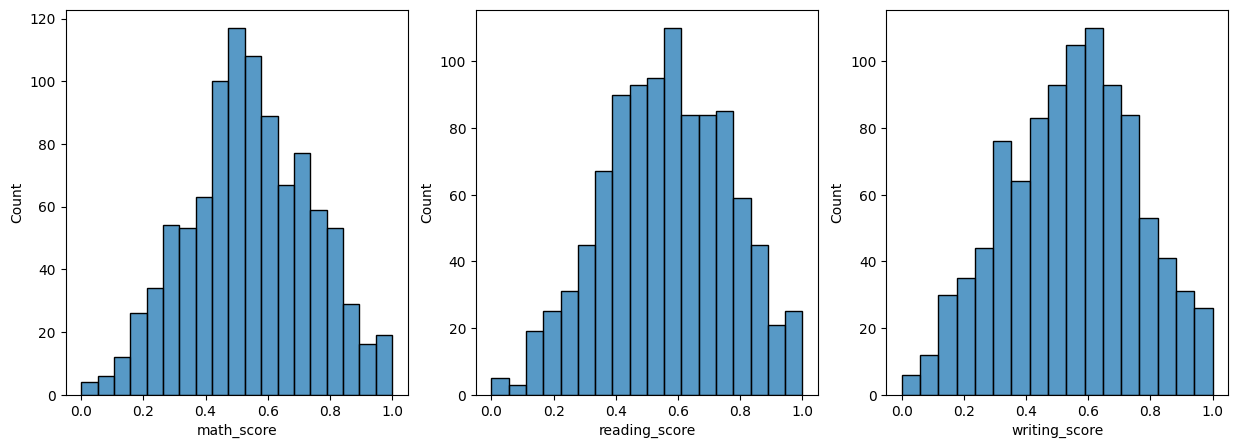

In [19]:
fig,axes = plt.subplots(1,3, figsize=(15,5))

sns.histplot(data=df["math_score"], ax=axes[0])
sns.histplot(data=df["reading_score"], ax=axes[1])
sns.histplot(data=df["writing_score"], ax=axes[2])